Nama Anggota Kelompok: Kelompok 8
1.   Achmad Rohmandzoni Z M          | 225150301111027
2.   Tengku Muhammad Fadlan Praditya | 225150307111051
3.   Zidan Fadil Yahya               | 225150300111034

---

SOAL:

1.   Dapatkan nilai minimum dari 𝑓(𝑥) = (𝑥 − 1)^2 dengan menggunakan metode turunan (derivatif). Cari dan hitung secara manual. Batasi hingga 3 iterasi
2.   Berdasarkan pekerjaan saudara dinomor 1 maka tulislah algoritma dari metode turunan (derivatif)
3. Berdasarkan algoritma turunan (derivatif) yang anda tuliskan di nomor 2 tersebut, buat program metode turunan (derivatif) menggunakan bahasa pemrograman python. Lakukan simulasi dengan fungsi sebagaimana nomor 1.

Masukkan nilai a (batas bawah): -4
Masukkan nilai b (titik tengah): -1
Masukkan nilai c (batas atas): 3

Iterasi |     a     |     b     |     c     |   f'(b)   |     d     |   Error   
      1 |  -4.00000 |  -1.00000 |   3.00000 |  -4.00000 |   1.47200 |   7.00000
      2 |  -1.00000 |   1.47200 |   3.00000 |   0.94400 |  -0.05570 |   4.00000
      3 |  -1.00000 |  -0.05570 |   1.47200 |  -2.11139 |   0.88842 |   2.47200
      4 |  -0.05570 |   0.88842 |   1.47200 |  -0.22316 |   1.24907 |   1.52770
      5 |   0.88842 |   1.24907 |   1.47200 |   0.49814 |   1.02619 |   0.58358
      6 |   0.88842 |   1.02619 |   1.24907 |   0.05238 |   0.94105 |   0.36065
      7 |   0.88842 |   0.94105 |   1.02619 |  -0.11790 |   0.99367 |   0.13777
      8 |   0.94105 |   0.99367 |   1.02619 |  -0.01267 |   1.01377 |   0.08514
      9 |   0.99367 |   1.01377 |   1.02619 |   0.02753 |   1.00134 |   0.03252
     10 |   0.99367 |   1.00134 |   1.01377 |   0.00269 |   0.99660 |   0.02010
     11 |   0.

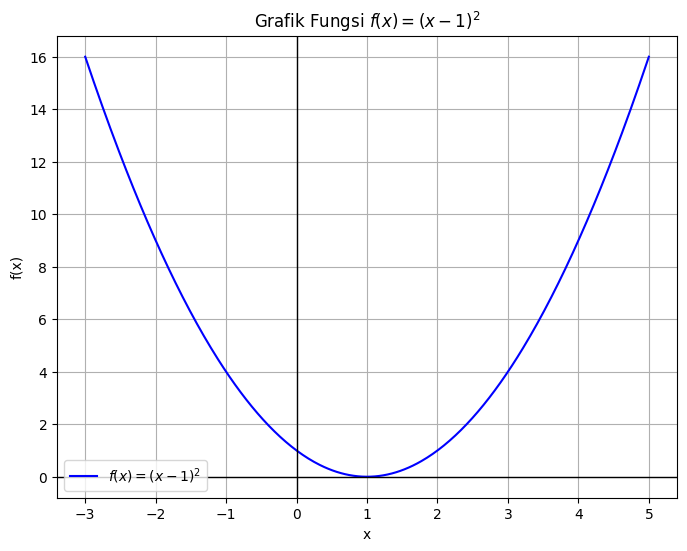

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

x_sym = sp.Symbol('x')
f_sym = (x_sym - 1)**2
df_sym = sp.diff(f_sym, x_sym)

def f(x):
    return float(f_sym.subs(x_sym, x))

def df(x):
    return float(df_sym.subs(x_sym, x))

def derivative_search(f, df, a, b, c, tol=1e-5):
    if a >= c:
        raise ValueError("Nilai a harus lebih kecil dari c.")

    R = 0.618
    iteration_data = []

    while abs(c - a) > tol:
        d = None
        deriv_b = df(b)
        if deriv_b > 0:
            d = b - R * (b - a)
            iteration_data.append((a, b, c, deriv_b, d, abs(c - a)))
            c = b
        elif deriv_b < 0:
            d = b + R * (c - b)
            iteration_data.append((a, b, c, deriv_b, d, abs(c - a)))
            a = b

        b = d

    x_min = b
    f_min = f(x_min)
    return x_min, f_min, iteration_data

def plot_function():
    x_values = np.linspace(-3, 5, 400)
    y_values = [f(x) for x in x_values]

    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, label=r"$f(x) = (x - 1)^2$", color='b')
    plt.title("Grafik Fungsi $f(x) = (x - 1)^2$")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.grid(True)
    plt.legend()
    plt.show()

try:
    a = float(input("Masukkan nilai a (batas bawah): "))
    b = float(input("Masukkan nilai b (titik tengah): "))
    c = float(input("Masukkan nilai c (batas atas): "))

    x_min, f_min, iteration_data = derivative_search(f, df, a, b, c)

    print("\nIterasi |     a     |     b     |     c     |   f'(b)   |     d     |   Error   ")
    for i, data in enumerate(iteration_data, start=1):
        print(f"{i:>7} | {data[0]:>9.5f} | {data[1]:>9.5f} | {data[2]:>9.5f} | {data[3]:>9.5f} | {data[4]:>9.5f} | {data[5]:>9.5f}")

    print(f"\nNilai minimum ditemukan di x = {x_min:.5f}, f(x) = {f_min:.5f}")

    plot_function()

except ValueError as e:
    print(f"Error: {e}")